<a href="https://colab.research.google.com/github/andreavittino/colab_notebooks/blob/main/CNN_classification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
# We load in the data
cifar_10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar_10.load_data()

In [3]:
# We rescale X and reshape y 
X_train, X_test = X_train/255., X_test/255.
y_train, y_test = y_train.flatten(), y_test.flatten()
print("Shape of x: {}".format(X_train.shape))
print("Shape of y: {}".format(y_train.shape))

Shape of x: (50000, 32, 32, 3)
Shape of y: (50000,)


In [4]:
# We check how many classes we have 
K = len(set(y_train))
print("the number of classes is {}".format(K))

the number of classes is 10


In [5]:
# We build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,[3,3],input_shape=X_train[0].shape,activation='relu',padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(32,[3,3],input_shape=X_train[0].shape,activation='relu',padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Conv2D(64,[3,3],activation='relu',padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(64,[3,3],activation='relu',padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Conv2D(128,[3,3],activation='relu',padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Conv2D(128,[3,3],activation='relu',padding='same'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPool2D(),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10,activation='softmax')
])

In [6]:
# We compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
# We train the model 
r = model.fit(X_train,y_train,epochs=10,validation_data = (X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3148 - accuracy: 0.5378 - val_loss: 1.0245 - val_accuracy: 0.6474
Epoch 2/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8642 - accuracy: 0.7017 - val_loss: 0.9929 - val_accuracy: 0.6623
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.7081 - accuracy: 0.7608 - val_loss: 0.7543 - val_accuracy: 0.7490
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5992 - accuracy: 0.7969 - val_loss: 0.7812 - val_accuracy: 0.7458
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5054 - accuracy: 0.8279 - val_loss: 0.7006 - val_accuracy: 0.7737
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.4313 - accuracy: 0.8545 - val_loss: 0.6142 - val_accuracy: 0.8084
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.3720 - accuracy: 0.8752 - val_loss: 0.6353 -

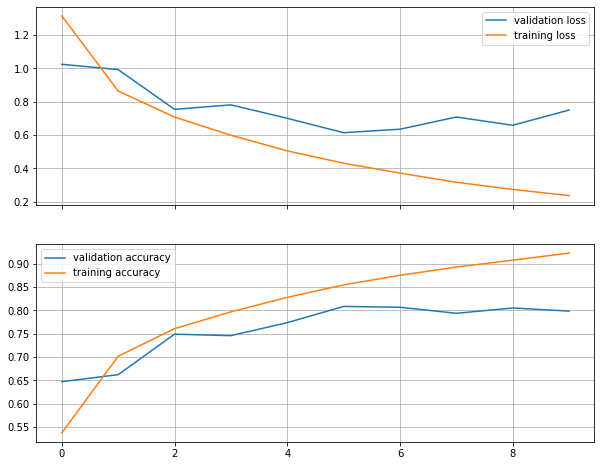

In [8]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8),sharex=True)
ax[0].plot(r.history['val_loss'], label = 'validation loss')
ax[0].plot(r.history['loss'], label = 'training loss')
ax[0].legend()
ax[1].plot(r.history['val_accuracy'],label = 'validation accuracy')
ax[1].plot(r.history['accuracy'],label = 'training accuracy')
ax[1].legend()
ax[0].grid()
ax[1].grid()

In [9]:
#Implement data augmentation to try to improve the performance of the model
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=20)

Epoch 1/20
1562/1562 [==============================] - 45s 29ms/step - loss: 0.8196 - accuracy: 0.7312 - val_loss: 0.7455 - val_accuracy: 0.7565
Epoch 2/20
1562/1562 [==============================] - 45s 29ms/step - loss: 0.7026 - accuracy: 0.7680 - val_loss: 0.6670 - val_accuracy: 0.7824
Epoch 3/20
1562/1562 [==============================] - 46s 29ms/step - loss: 0.6513 - accuracy: 0.7838 - val_loss: 0.6425 - val_accuracy: 0.7847
Epoch 4/20
1562/1562 [==============================] - 45s 29ms/step - loss: 0.6176 - accuracy: 0.7941 - val_loss: 0.5842 - val_accuracy: 0.8066
Epoch 5/20
1562/1562 [==============================] - 45s 29ms/step - loss: 0.5945 - accuracy: 0.8038 - val_loss: 0.5822 - val_accuracy: 0.8086
Epoch 6/20
1562/1562 [==============================] - 45s 29ms/step - loss: 0.5729 - accuracy: 0.8096 - val_loss: 0.5253 - val_accuracy: 0.8301
Epoch 7/20
1562/1562 [==============================] - 45s 29ms/step - loss: 0.5529 - accuracy: 0.8159 - val_loss: 0.6022 -

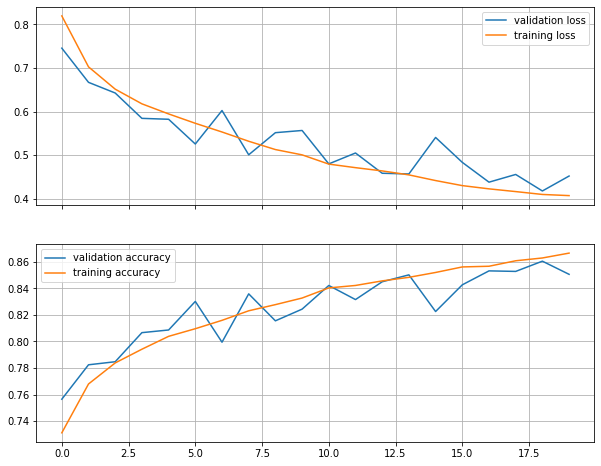

In [12]:
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,8),sharex=True)
ax[0].plot(r.history['val_loss'], label = 'validation loss')
ax[0].plot(r.history['loss'], label = 'training loss')
ax[0].legend()
ax[1].plot(r.history['val_accuracy'],label = 'validation accuracy')
ax[1].plot(r.history['accuracy'],label = 'training accuracy')
ax[1].legend()
ax[0].grid()
ax[1].grid()

Confusion matrix, without normalization
[[898  20  24   8   2   3   2   2  23  18]
 [  1 979   1   0   0   0   1   0   0  18]
 [ 60   4 824  16   7  31  40  10   2   6]
 [ 15   8  58 610  26 196  56  16   5  10]
 [ 16   4  71  26 755  32  49  46   1   0]
 [  5   6  28  54  14 859  14  19   0   1]
 [  9   8  32  16   2  16 909   5   1   2]
 [  7   3  14   7  12  36   0 913   2   6]
 [ 43  34  15   6   1   4   1   0 881  15]
 [ 12  95   1   4   0   3   1   2   5 877]]


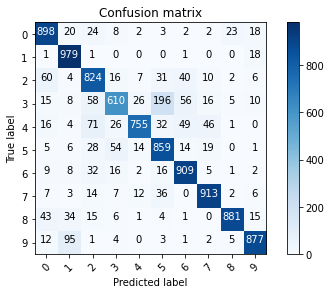

In [13]:
#We build the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))